<a href="https://colab.research.google.com/github/Sg0107/CNN/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/15
25/25 [==============================] - 4s 104ms/step - loss: 2.5879 - accuracy: 0.7492 - val_loss: 1.0966 - val_accuracy: 0.8749
Epoch 2/15
25/25 [==============================] - 2s 90ms/step - loss: 0.5424 - accuracy: 0.9165 - val_loss: 0.1575 - val_accuracy: 0.9538
Epoch 3/15
25/25 [==============================] - 2s 85ms/step - loss: 0.1074 - accuracy: 0.9662 - val_loss: 0.0789 - val_accuracy: 0.9724
Epoch 4/15
25/25 [==============================] - 2s 92ms/step - loss: 0.0673 - accuracy: 0.9764 - val_loss: 0.0557 - val_accuracy: 0.9804
Epoch 5/15
25/25 [==============================] - 2s 91ms/step - loss: 0.0459 - accuracy: 0.9842 - val_loss: 0.0421 - val_accuracy: 0.9847
Epoch 6/15
25/25 [==============================] - 2s 91ms/step - loss: 0.0382 - accuracy: 0.9866 - val_loss: 0.0369 - val_accuracy: 0.9864
Epoch 7/15
25/25 [==============================] - 2s 91ms/step - loss: 0.0332 - accuracy: 0.9882 - val_loss: 0.0328 - val_accuracy: 0.9892
Epoch 8/15
2

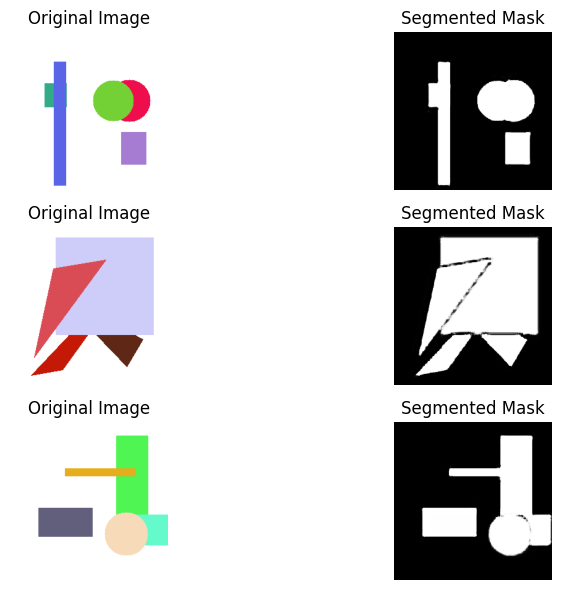

In [34]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
def generate_dataset(num_samples, image_size=(256, 256), num_shapes=5):
    X = []
    Y = []
    for _ in range(num_samples):
        image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255  # white background
        mask = np.zeros((image_size[0], image_size[1]), dtype=np.uint8)

        for _ in range(num_shapes):
            shape = np.random.choice(['rectangle', 'circle', 'triangle'])
            color = np.random.randint(0, 255, 3).tolist()  # Convert to list
            if shape == 'rectangle':
                x1, y1 = np.random.randint(10, image_size[0] - 50), np.random.randint(10, image_size[1] - 50)
                x2, y2 = np.random.randint(x1 + 10, image_size[0]), np.random.randint(y1 + 10, image_size[1])
                cv2.rectangle(image, (x1, y1), (x2, y2), color, -1)
                cv2.rectangle(mask, (x1, y1), (x2, y2), 1, -1)
            elif shape == 'circle':
                center = np.random.randint(50, image_size[0] - 50, 2)
                radius = np.random.randint(10, 40)
                cv2.circle(image, tuple(center), radius, color, -1)
                cv2.circle(mask, tuple(center), radius, 1, -1)
            elif shape == 'triangle':
                vertices = np.random.randint(10, image_size[0] - 10, (3, 2))
                cv2.drawContours(image, [vertices.reshape((-1, 1, 2))], -1, color, -1)
                cv2.drawContours(mask, [vertices.reshape((-1, 1, 2))], -1, 1, -1)

        X.append(image)
        Y.append(mask)

    return np.array(X), np.array(Y)

# Create dataset
X, Y = generate_dataset(1000)


# Split dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

# Define model
model_1 = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

# Compile model
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model_1.fit(X_train, Y_train, epochs=15, batch_size=32, validation_data=(X_val, Y_val))

# Perform segmentation on validation images
predictions_1 = model_1.predict(X_val[:5])

# Plot the original image and segmented mask
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(3, 2, 2*i+1)
    plt.imshow(X_val[i])
    plt.title("Original Image")
    plt.axis('off')
    plt.subplot(3, 2, 2*i+2)
    plt.imshow(predictions_1[i].reshape(256,256), cmap='gray')
    plt.title("Segmented Mask")
    plt.axis('off')
plt.tight_layout()
plt.show()
